# Warm up - KNN

Consider the [0,1] x [0,1] unit square. In this square we have points of several colors (classes). The goal is determine which color should be used to paint each of the non-painted points in the square using KNN.  

In [1]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Generating the training set

In [2]:
# color palette
test_colors = ['dodgerblue', 'yellow', 'lightgreen']
train_colors = ['blue', 'orange', 'green']

def generate_data(N, cluster_type):
    """
    Generate 3 clusters of points each of size N. These clusters can be
    either separated, slightly mixed, or completely random.
    
    Args:
        N              - number of points in a single cluster
        cluster_type   - 'separated', 'mixed' or 'random'
        
    Return:
        X_train - numpy array of dim (3N,2) that holds (x,y) point coordinates 
        y_train - numpy array of dim (3N,) that holds labels (0,1, or 2)
    """
    np.random.seed(seed=50)
    
    if cluster_type == 'separated':
        x1 = 1 + 3*np.random.rand(N)
        y1 = 1 + 3*np.random.rand(N)

        x2 = 7 + 4*np.random.rand(N)
        y2 = 2 + 4*np.random.rand(N)

        x3 = 14 + 2*np.random.rand(N)
        y3 = 6  + 5*np.random.rand(N)
        
    elif cluster_type == 'mixed':
        x1 = 1 + 3*np.random.rand(N)
        y1 = 1 + 3*np.random.rand(N)

        x2 = 2 + 4*np.random.rand(N)
        y2 = 2 + 4*np.random.rand(N)

        x3 = 3 + 5*np.random.rand(N)
        y3 = 3 + 5*np.random.rand(N)
        
    elif cluster_type == 'random':
        x1 = np.random.rand(N)
        y1 = np.random.rand(N)

        x2 = np.random.rand(N)
        y2 = np.random.rand(N)

        x3 = np.random.rand(N)
        y3 = np.random.rand(N)
    else:
        return (None, None)
    
    # normalizing so that points are in the [0,1]x[0,1] box
    max_x = max(max(x1), max(x2), max(x3))
    x1 /= max_x
    x2 /= max_x
    x3 /= max_x
    max_y = max(max(y1), max(y2), max(y3))
    y1 /= max_y
    y2 /= max_y
    y3 /= max_y
        

    # preparing X_train by concatenating the three sets of points
    col1 = np.concatenate((x1, x2, x3))  # array of shape (3N,)
    col2 = np.concatenate((y1, y2, y3))  # array of shape (3N,)

    # reshaping into (N,2)
    col1 = col1.reshape(-1,1)                   # -1 means whichever value that make the reshape work
    col2 = col2.reshape(-1,1)

    X_train = np.column_stack((col1, col2))
    X_train = np.around(X_train,2)              # rounding to two decimals

    # preparing y_train by setting the proper labels 
    y_train = np.ones (3*N)
    y_train[0:N] -= 1 
    y_train[2*N:3*N] += 1
    return (X_train, y_train)

In [3]:
N= 70
#X_train, y_train = generate_data(N, 'separated')
X_train, y_train = generate_data(N, 'random')
#X_train, y_train = generate_data(N, 'mixed')

print ('X_train shape: ', X_train.shape)
print ('X_train first 10 points:')
print (X_train[0:10,])
print()

print ('y_train shape: ', y_train.shape)
#print ('y_train first 10 points:')
#print (y_train[0:10,])

X_train shape:  (210, 2)
X_train first 10 points:
[[0.5  0.69]
 [0.23 0.98]
 [0.26 0.23]
 [0.4  0.73]
 [0.38 0.81]
 [1.   0.95]
 [0.41 0.86]
 [0.77 0.43]
 [0.76 0.01]
 [0.31 0.04]]

y_train shape:  (210,)


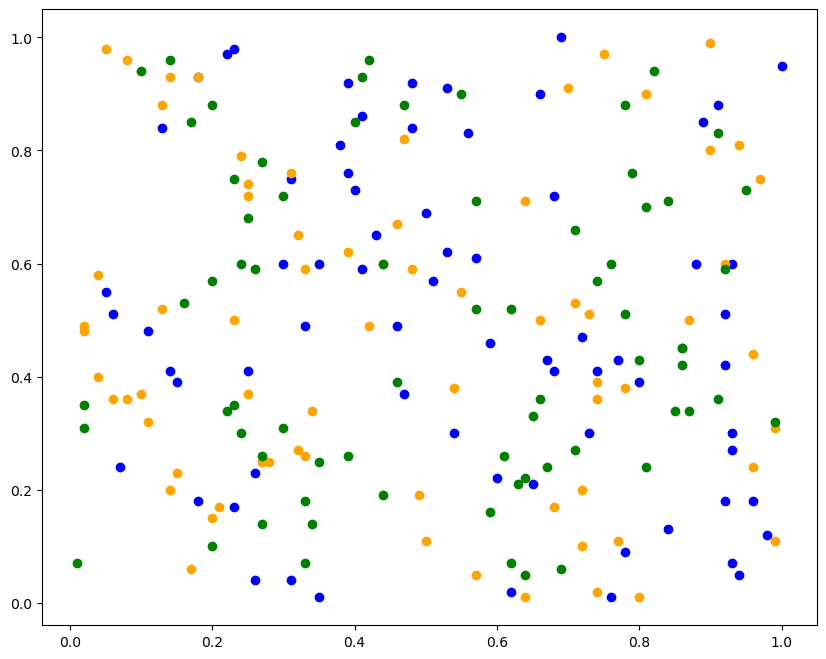

In [4]:
#plotting train points
for i in range(3):
    a_trn = X_train[np.where(y_train ==i)][:,0]  # grab X_train points for which label is i. grab x coordinate
    b_trn = X_train[np.where(y_train ==i)][:,1]  # grab X_train points for which label is i. grab y coordinate 
    plt.scatter(a_trn, b_trn, color=train_colors[i], label = i,)
    
plt.show()

In [5]:
resolution = 100
X_test = np.ones((resolution*resolution, 2))
for i in np.arange(0,resolution,):
    for j in np.arange(0,resolution):
        X_test[i*resolution + j,0] = i/resolution   
        X_test[i*resolution + j,1] = j/resolution
        
print ('Shape of X_test:', X_test.shape)

Shape of X_test: (10000, 2)


### Use KNN to paint the whole unit square

1. Define a nearset neighbor classifier using KNeighborsClassifier and use it along with the training data to produce prediction for the given test points (X_test). 
2. Place your precdiction in the variable y_pred.
3. Plot below both train and test. See if result makes sense.

Repeat the above for the three modes of training data - 'separated', 'random', 'mixed'. 
1. For 'mixed' mode, try K=1 and K=9. Can you see a difference?
2. Use K=3, 'mixed' data with both L1 and L2 distances (i.e., Manhattan and Euclidean distances, respectively). Can you see a difference in the boundary shape?

For each combination of data and hyper-parameters plot a graph. In the graph title, include the hyper-parameters and the data type ('separated', 'random', 'mixed').

In [6]:
from sklearn.neighbors import KNeighborsClassifier

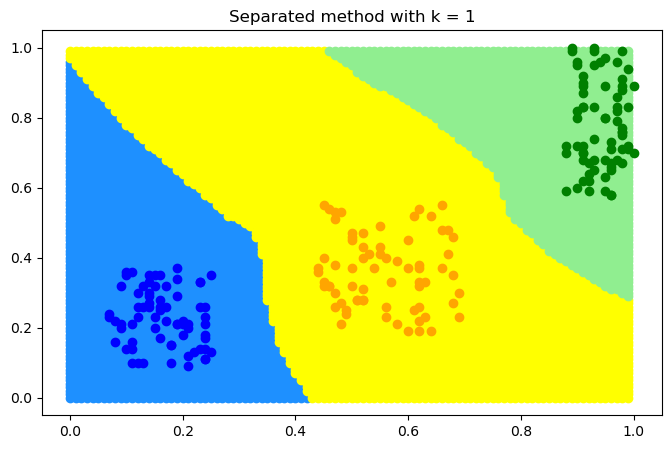

In [7]:
#Separated cluster type
X_train, y_train = generate_data(N, 'separated')

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5  # width, height

#plotting test and points:
for i in range(3):
    a_trn = X_train[np.where(y_train ==i)][:,0]  # grab X_train points for which label is i. grab the x coordinate
    b_trn = X_train[np.where(y_train ==i)][:,1]  # grab X_train points for which label is i. grab the y coordinate
    a_tst = X_test[np.where(y_pred ==i)][:,0]    # grab X_train points for which label is i. grab the x coordinate
    b_tst = X_test[np.where(y_pred ==i)][:,1]    # grab X_train points for which label is i. grab the y coordinate
    
    plt.scatter(a_tst, b_tst, color=test_colors[i])
    plt.scatter(a_trn, b_trn, color=train_colors[i], label = i,)
    plt.title("Separated method with k = 1")

plt.show()

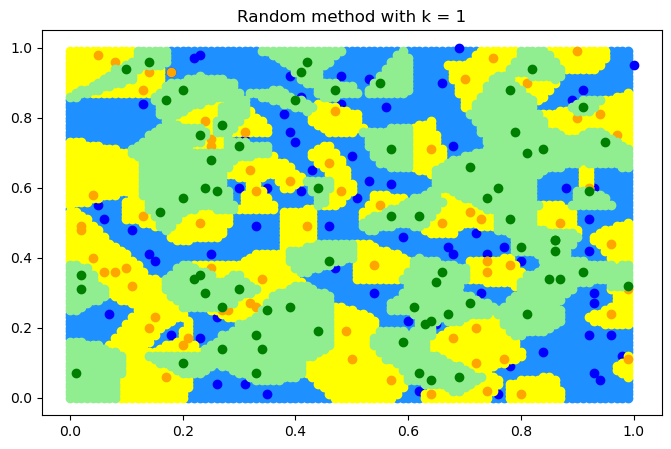

In [8]:
#Random cluster type
X_train, y_train = generate_data(N, 'random')

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5  # width, height

#plotting test and points:
for i in range(3):
    a_trn = X_train[np.where(y_train ==i)][:,0]  # grab X_train points for which label is i. grab the x coordinate
    b_trn = X_train[np.where(y_train ==i)][:,1]  # grab X_train points for which label is i. grab the y coordinate
    a_tst = X_test[np.where(y_pred ==i)][:,0]    # grab X_train points for which label is i. grab the x coordinate
    b_tst = X_test[np.where(y_pred ==i)][:,1]    # grab X_train points for which label is i. grab the y coordinate
    
    plt.scatter(a_tst, b_tst, color=test_colors[i])
    plt.scatter(a_trn, b_trn, color=train_colors[i], label = i,)
    plt.title("Random method with k = 1")

plt.show()

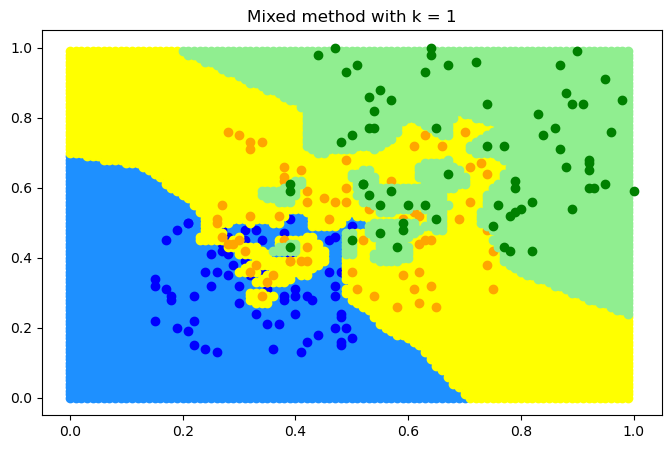

In [9]:
#Mixed cluster type - k = 1
X_train, y_train = generate_data(N, 'mixed')

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5  # width, height

#plotting test and points:
for i in range(3):
    a_trn = X_train[np.where(y_train ==i)][:,0]  # grab X_train points for which label is i. grab the x coordinate
    b_trn = X_train[np.where(y_train ==i)][:,1]  # grab X_train points for which label is i. grab the y coordinate
    a_tst = X_test[np.where(y_pred ==i)][:,0]    # grab X_train points for which label is i. grab the x coordinate
    b_tst = X_test[np.where(y_pred ==i)][:,1]    # grab X_train points for which label is i. grab the y coordinate
    
    plt.scatter(a_tst, b_tst, color=test_colors[i])
    plt.scatter(a_trn, b_trn, color=train_colors[i], label = i,)
    plt.title("Mixed method with k = 1")
    
plt.show()

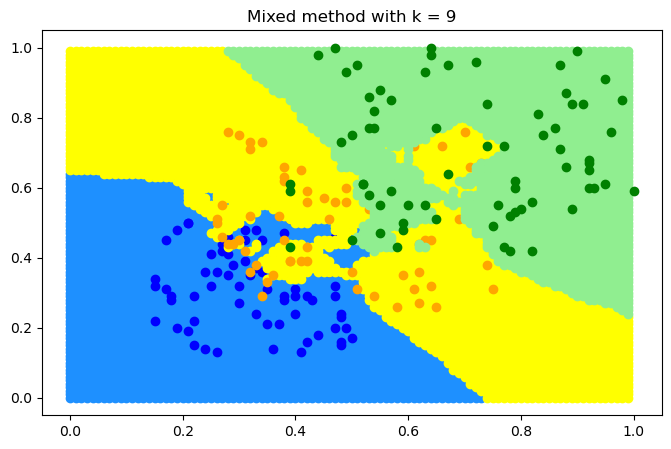

In [10]:
#Mixed cluster type - k = 9
X_train, y_train = generate_data(N, 'mixed')

knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5  # width, height

#plotting test and points:
for i in range(3):
    a_trn = X_train[np.where(y_train ==i)][:,0]  # grab X_train points for which label is i. grab the x coordinate
    b_trn = X_train[np.where(y_train ==i)][:,1]  # grab X_train points for which label is i. grab the y coordinate
    a_tst = X_test[np.where(y_pred ==i)][:,0]    # grab X_train points for which label is i. grab the x coordinate
    b_tst = X_test[np.where(y_pred ==i)][:,1]    # grab X_train points for which label is i. grab the y coordinate
    
    plt.scatter(a_tst, b_tst, color=test_colors[i])
    plt.scatter(a_trn, b_trn, color=train_colors[i], label = i,)
    plt.title("Mixed method with k = 9")
    
plt.show()

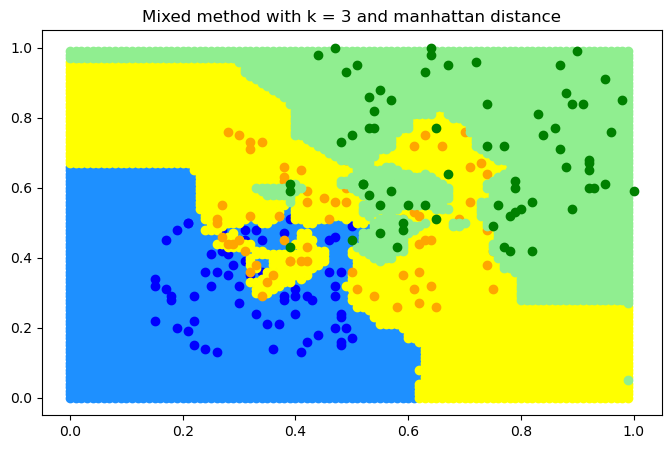

In [11]:
#Mixed cluster type k = 3 manhattan
X_train, y_train = generate_data(N, 'mixed')

knn = KNeighborsClassifier(n_neighbors=3,metric='manhattan')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5  # width, height

#plotting test and points:
for i in range(3):
    a_trn = X_train[np.where(y_train ==i)][:,0]  # grab X_train points for which label is i. grab the x coordinate
    b_trn = X_train[np.where(y_train ==i)][:,1]  # grab X_train points for which label is i. grab the y coordinate
    a_tst = X_test[np.where(y_pred ==i)][:,0]    # grab X_train points for which label is i. grab the x coordinate
    b_tst = X_test[np.where(y_pred ==i)][:,1]    # grab X_train points for which label is i. grab the y coordinate
    
    plt.scatter(a_tst, b_tst, color=test_colors[i])
    plt.scatter(a_trn, b_trn, color=train_colors[i], label = i,)
    plt.title("Mixed method with k = 3 and manhattan distance")
    
plt.show()

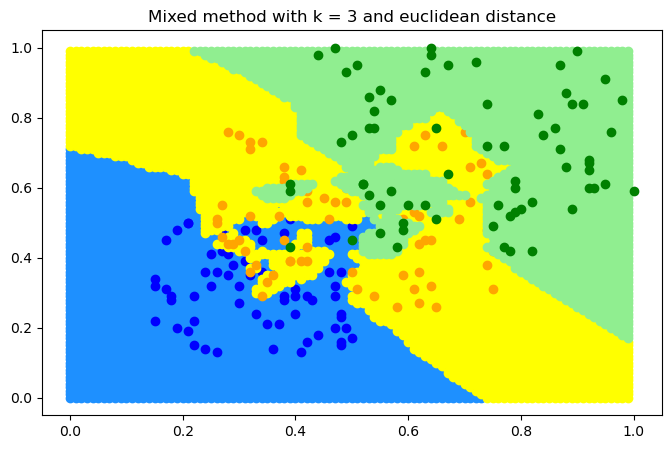

In [12]:
#Mixed cluster type k = 3 euclidean
X_train, y_train = generate_data(N, 'mixed')

knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5  # width, height

#plotting test and points:
for i in range(3):
    a_trn = X_train[np.where(y_train ==i)][:,0]  # grab X_train points for which label is i. grab the x coordinate
    b_trn = X_train[np.where(y_train ==i)][:,1]  # grab X_train points for which label is i. grab the y coordinate
    a_tst = X_test[np.where(y_pred ==i)][:,0]    # grab X_train points for which label is i. grab the x coordinate
    b_tst = X_test[np.where(y_pred ==i)][:,1]    # grab X_train points for which label is i. grab the y coordinate
    
    plt.scatter(a_tst, b_tst, color=test_colors[i])
    plt.scatter(a_trn, b_trn, color=train_colors[i], label = i,)
    plt.title("Mixed method with k = 3 and euclidean distance")
plt.show()

### Difference between k = 1 to k = 9

There is a difference between the knn plot between k = 1 and k = 9. 

The difference comes from that k = 1 is overfitting and k = 9 is underfitting, we can see it also in the plots.


### Manhattan VS Euclidean

Yes we can see difference in the boundary shape, as we see the manhattan distance, the boundary shape is stright and parallel to the axis because of it's formula with the absolute value, and for the euclidean distance we can see the boundary shape is more flexible because of it's formula with the square and the square root.

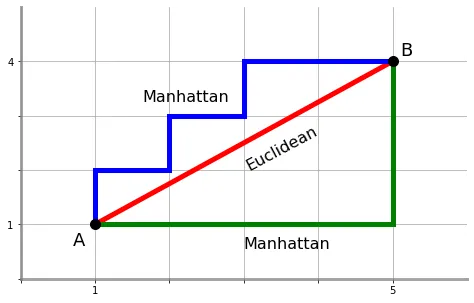

### Retrospective

Check the results. Do they make sense? Explain the visualization.

Yes it make sense, as ive told above, when using the manhattan distance metric the absolute value in its formula makes the boundary stright and parallel to the axis while the euclidean and the square root in its formula gives the model more flexibility to adjust and makes flexible lines.


# Warm up - Logistic Regression

In [13]:
# Function for ploting the decision boundaries of a model
# You will use it later
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    markers = ('.', '.')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        
    return Z

### Create data

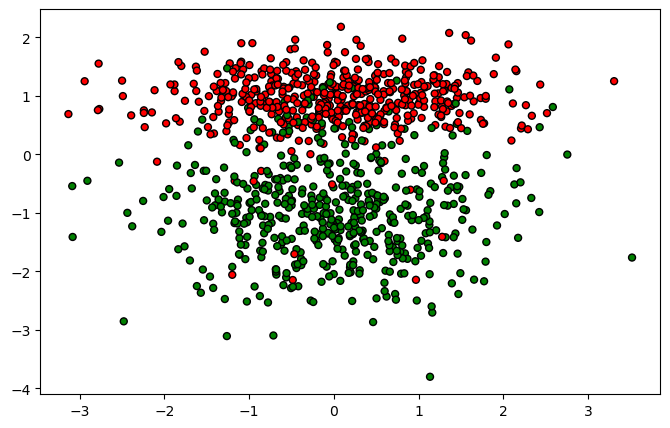

In [14]:
np.random.seed(25)
X, Y = make_classification(
    n_samples=1000, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=0.05
)

colors = ['r' if x else 'g' for x in Y]
plt.scatter(X[:, 0], X[:, 1], marker="o", c=colors, s=25, edgecolor="k")

You are given an already implemented logistic regression class. Understand the code and use it in the next part.

In [15]:
class LogisticRegressionGD(object):
    """
    Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    eps : float
      minimal change in the cost to declare convergence
    random_state : int
      Random number generator seed for random weight
      initialization.
    """
    
    def __init__(self, eta=0.00005, n_iter=10000, eps=0.000001, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.eps = eps
        self.random_state = random_state

    def fit(self, X, y):
        """ 
        Fit training data (the learning phase).
        Updating the theta vector in each iteration using gradient descent.
        Store the theta vector in an attribute of the LogisticRegressionGD object.
        Stop the function when the difference between the previous cost and the current is less than eps
        or when you reach n_iter.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        """
        rgen = np.random.RandomState(self.random_state)
        self.theta = np.random.normal(loc=0.0, scale=1, size=1 + X.shape[1])
        self.cost = []
        old_cost = 0
        output = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (output - y)
            self.theta[1:] -= self.eta * X.T.dot(errors)
            self.theta[0] -= self.eta * errors.sum()
            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))).sum() / X.shape[0]
            if abs(cost - old_cost) < self.eps:
                break
            old_cost = cost
            self.cost.append(cost)
    
    def predict(self, X):
        """Return the predicted class label"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    
    def predict_prob(self, X):
        """Return the predicted class label"""
        return self.activation(self.net_input(X))
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.theta[1:]) + self.theta[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))


## Cross Validation

Use 5-fold cross validation in order to find the best eps and eta params from the given lists.

For this part, you can use a straightforward approach and loop on all possible hyper-parameter combinations, or use dedicated functions from `sklearn`.

Shuffle the training set before you split the data to the folds.

In [16]:
etas = [0.05, 0.005, 0.0005, 0.00005, 0.000005]
epss = [0.01, 0.001, 0.0001, 0.00001, 0.000001]

In [17]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, KFold

np.random.seed(25)

# Define the hyperparameters to search over which were given by alon, tol is shorcut of tolerance (epsilon)
parameters = {'eta0': etas,'tol':epss}

# Create an SGDClassifier model - Stochastic Gradient Descent
sgd = SGDClassifier(loss='log', random_state=50)

# Create a GridSearchCV object with 5-Fold cross-validation and f1 scoring method
cross_validation = KFold(n_splits=5, shuffle=True, random_state=50)
grid_search = GridSearchCV(sgd,parameters, cv=cross_validation, scoring='f1')

# Fit the GridSearchCV object to the training data
grid_search.fit(X, Y)

# Print the best hyperparameters and the corresponding f1 score
print("Best hyper parameters: ", grid_search.best_params_)
print("Best f1 score: ", grid_search.best_score_)

Best hyper parameters:  {'eta0': 0.05, 'tol': 0.0001}
Best f1 score:  0.9258517569207415


In this question i was helped by chat GPT, i asked the chat which functions of sklearn can help me find the best score and hyper parameters fit for logistic regression model by using kfold cross validation and the answer was this functions :
- SGDClassifier() - sklearn.linear_model
- KFold() - sklearn.model_selection
- GridSearchCV() - sklearn.model_selection
- fit ()
- best_params_()
- best_score_()


## Model evaluation

1. Build a model with the best params that you found in the previous section.
1. Fit the model to the entire dataset.
1. Print the cross validation score.
1. Use the `plot_decision_regions` function to plot the decision boundaries.
1. Plot the model cost as a function of the iterations.

In [18]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import statistics as st

np.random.seed(25)

lgm = LogisticRegressionGD(eta=0.05, n_iter=10000, eps=0.0001, random_state=50)
f1_scores = {}
kfold = KFold(n_splits=5, shuffle=True, random_state=50)

for fold, (train_index, test_index) in enumerate(kfold.split(X, Y)):
    X_train, y_train = X[train_index], Y[train_index]
    X_test, y_test = X[test_index], Y[test_index]

    lgm.fit(X_train, y_train)
    y_pred = lgm.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores[fold] = f1
    
    print("Fold:", fold, "F1 Score:", f1)

print("Average f1 score: ", st.mean(f1_scores.values()))


Fold: 0 F1 Score: 0.9289617486338798
Fold: 1 F1 Score: 0.8924731182795698
Fold: 2 F1 Score: 0.9400921658986175
Fold: 3 F1 Score: 0.9423076923076923
Fold: 4 F1 Score: 0.9310344827586206
Average f1 score:  0.926973841575676


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

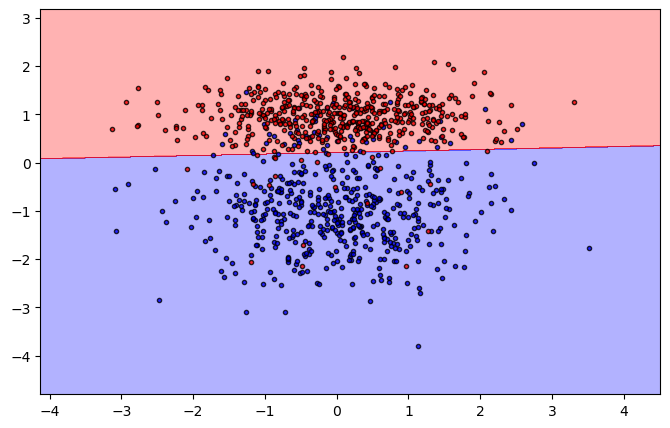

In [19]:
plot_decision_regions(X, Y, lgm)

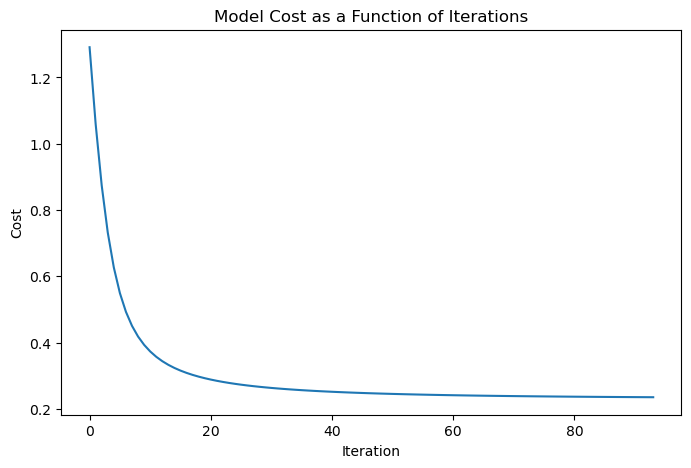

In [20]:
import matplotlib.pyplot as plt
import statistics

np.random.seed(25)

#i know that the best eta (learning rate) i found its 0.05 but when i print the costs variable, the ouput produce me nan.
#therefore i decided to change the eta by reducing it, that my cost function will converge,
#so i changed eta to smaller number
lgm = LogisticRegressionGD(eta=0.0005, n_iter=10000, eps=0.0001, random_state=50)

#lgm = LogisticRegressionGD(eta=0.05, n_iter=10000, eps=0.0001, random_state=50)

lgm.fit(X,Y)
    
costs = lgm.cost # record cost at each iteration
number_of_iterations = len(costs)

plt.plot(range(number_of_iterations), costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Model Cost as a Function of Iterations')
plt.show()


## Create 3-classes dataset

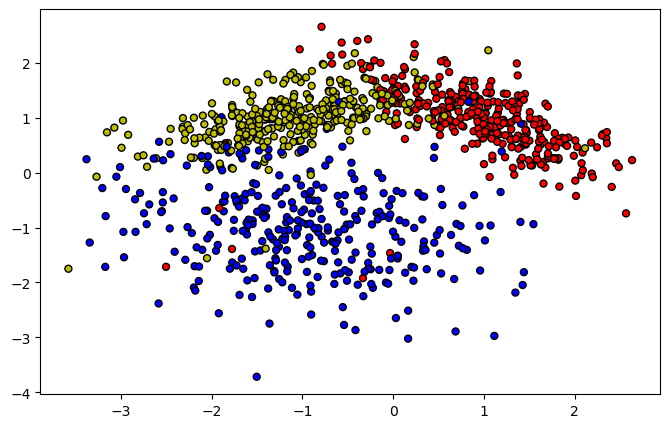

In [21]:
np.random.seed(28)
X, Y = make_classification(
    n_samples=1000, n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, flip_y=0.05
)
colors = ['r' if x==2 else 'y' if x==1 else 'b' for x in Y]
plt.scatter(X[:, 0], X[:, 1], marker="o", c=colors, s=25, edgecolor="k")
plt.show()

## Create 1-vs-all classifier

1. Notice the `predict_prob` function in the logistic regression class. This functions returns the "probability" to be in the positive class.
1. For each class, create 1-vs-all classifier (a single class would be positive, the rest would be negative) and use the 3 classifiers to predict the class of any instance.
1. Recall that an instance $x$ will be predicted to class $i$ if $P(x$ belongs to class $i) > P(x$ belongs to class $j)\ \forall j \neq i$
1. Print the training accuracy.
1. Store the models in the models variable - you will use it in the evaluation below.

In [22]:
probs = np.zeros((Y.shape[0], 3))
models = []

# create one-vs-all classifiers for each class
for group in range(3):
    # set the positive class label to group and negative class label to all other classes
    y_positive = np.array(Y == group)
    y_rest = np.array(Y != group)

    # fit a logistic regression classifier and store the model
    model = LogisticRegressionGD()
    model.fit(X, y_positive)
    models.append(model)
    
    # predict the probabilities of each instance belonging to the positive class with the predict_prob function
    probs[:, group] = model.predict_prob(X)

# predict the class labels based on the classifier with the highest probability
y_pred = np.argmax(probs, axis=1)

#Printing the differnce array between the real class and the predicted calss - we classified 887 classes right out of 1000.
diff = (Y == y_pred)
print("We classified",np.sum(diff), "right classes out of 1000")

# calculate training accuracy
accuracy = (np.sum(diff)/Y.shape[0])
print("Training accuracy in percentage is:", accuracy*100)

We classified 887 right classes out of 1000
Training accuracy in percentage is: 88.7


Use the models variable and the `plot_decision_regions_3_classes` to plot the decision boundaries.

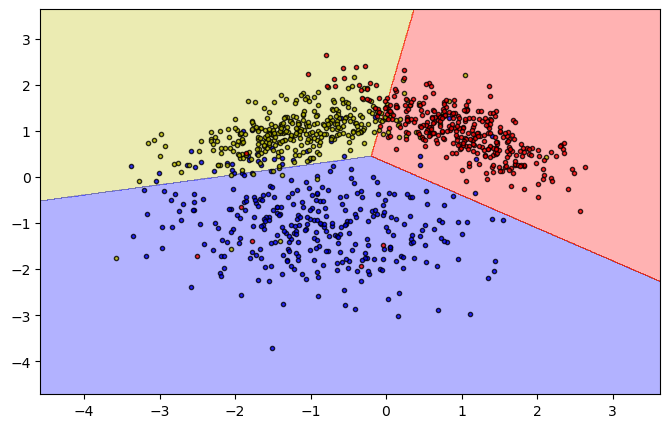

In [23]:
# Function for ploting the decision boundaries of a model
def plot_decision_regions_3_classes(X, y, models, resolution=0.01):

    # setup marker generator and color map
    markers = ('.', '.', '.')
    colors = ('b', 'y', 'r')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = np.zeros((np.array([xx1.ravel(), xx2.ravel()]).T.shape[0], 3))
    Z[:, 0] = models[0].predict_prob(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z[:, 1] = models[1].predict_prob(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z[:, 2] = models[2].predict_prob(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.argmax(axis=1)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        
    return Z

plot_decision_regions_3_classes(X, Y, models)
plt.show()

# Titanic survival prediction



In this part we will attempt to predict who survived on the Titanic. The data set we use has the following vairbales (features/attributes):


|  Variable   |          Definition          |              Key/Values                 |
|:-----------:|:----------------------------:|:---------------------------------------:|
| PassengerId | Index                        |integer                                  |
| Pclass      | Ticket class                 |1=1st, 2=2nd, 3=3rd                      |
| Name        | Name of passenger            |string                                   |
| Sex         | Sex                          |male, female                             |
| Age         | Age in years                 |integer                                  |
| SibSp       | # of siblings/spouses aboard |integer                                  |
| Parch       | # of parents/children aboard |integer                                  |
| Ticket      | Ticket number                |string                                   |
| Fare        | Ticket fare                  |float                                    |
| Cabin       | Cabin number                 |a code                                   |
| Embarked    | Port of Embarkation          |C=Cherbourg, Q=Queenstown, S=Southampton |
| **Survived**| Predicted varibale           |0=No, 1=Yes                              |


**Goal:**

The goal is to produce the best score possible.

**Methodogology**

So far you only two methods for classification: KNN and logistic regression. You can also use linear regression, but then you need to convert the output to 0s and 1s (this is not a straight forward use of linear regression but a possible one). You may want to choose which features to use (it could be that some features are not useful). Further, some features have missing values. You will need to decide how to handle this (for instance: drop rows with missing values, place an avergae value in those rows, or some other method of your choosing). Another matter to consider is handling non-numeric values. For example, sex is non-numeric. You may choose to drop non-numeric features, or you could convert them to numeric values (if such conversion makes sense).
Also you will need to consider splitting the data into a training set and a test set so as to avoid tailoring the solution (overfitting) to the data you have.

Bottom line: use everything we talked about in class in order to learn the best model.


**Model Output**

Your model needs to produce a prediciton for each data sample (row), which is 0 (did not survive) or 1 (survived). 

**Scoring your model**

Your model performance will be assessed on test data that is not available to you (you will see the score next semester). Try to avoid overfitting.

<br><br>
**Final Note**

This part of the project is open ended, in that you are not given small and specific tasks. However, you are already familiar with all the components needed to succeed. Specifically, reading data into pandas dataframe, dropping columns, dropping rows, changing value of features, splitting data into train and test subsets and performing model training and hyper parameter tuning via cross validation using sklearn library.

GOOD LUCK

### Assigning the data into variable 

In [24]:
import pandas as pd
titanic = pd.read_csv('titanic_train.csv')
print(titanic)

     PassengerId  Pclass                               Name     Sex   Age  \
0            315       2                 Hart, Mr. Benjamin    male  43.0   
1            328       2            Ball, Mrs. (Ada E Hall)  female  36.0   
2            879       3                 Laleff, Mr. Kristo    male   NaN   
3            288       3               Naidenoff, Mr. Penko    male  22.0   
4            280       3   Abbott, Mrs. Stanton (Rosa Hunt)  female  35.0   
..           ...     ...                                ...     ...   ...   
707          829       3       McCormack, Mr. Thomas Joseph    male   NaN   
708           38       3           Cann, Mr. Ernest Charles    male  21.0   
709          230       3            Lefebre, Miss. Mathilde  female   NaN   
710          311       1     Hays, Miss. Margaret Bechstein  female  24.0   
711          235       2  Leyson, Mr. Robert William Norman    male  24.0   

     SibSp  Parch        Ticket     Fare Cabin Embarked  Survived  
0      

### Data exploration - Statistics

In [25]:
# Group data by Survived column
grouped_data = titanic.groupby('Survived')

# Calculate mean and median age for each group
mean_age = grouped_data['Age'].mean()
median_age = grouped_data['Age'].median()

# Print the results
print("Mean age by survival status:\n", mean_age)
print("\nMedian age by survival status:\n", median_age)

#SD and Mean table by filtering sex and Pclass
Sex_Pclass =titanic.groupby(['Pclass','Sex'])
print("\nSD: ", Sex_Pclass.std())
print("\nMean: ", Sex_Pclass.mean())

#Male Vs Female - survival pivot table and survival rates
print("\n", titanic.groupby(['Sex'])['PassengerId'].count(), "\n")
print("\n", titanic.pivot_table(index='Sex', columns='Survived', values='PassengerId', aggfunc='count'), "\n")
survival_rates = titanic.groupby('Sex')['Survived'].mean()
print("\n", survival_rates*100, "\n")

# Get a summary of the numerical columns
print("\n", titanic.describe())

# Count the number of missing values in each column
print("\n", titanic.isnull().sum())


Mean age by survival status:
 Survived
0    30.605655
1    29.170258
Name: Age, dtype: float64

Median age by survival status:
 Survived
0    28.0
1    29.0
Name: Age, dtype: float64

SD:                 PassengerId        Age     SibSp     Parch       Fare  Survived
Pclass Sex                                                                    
1      female   244.301671  13.756019  0.577350  0.702120  59.591718  0.162192
       male     249.582192  15.094902  0.561604  0.589715  81.827567  0.483494
2      female   244.306394  13.750266  0.622234  0.838430  11.967425  0.255609
       male     253.254336  14.837323  0.510982  0.476046  13.875073  0.367857
3      female   261.804657  12.463491  1.621299  1.047950  11.717631  0.502288
       male     263.224983  11.565873  1.310999  0.659587  12.168196  0.356136

Mean:                 PassengerId        Age     SibSp     Parch        Fare  \
Pclass Sex                                                              
1      female   458.46666

From our data exploration, we can observe that there are 143 missing values in the 'Age' column, 549 missing values in the 'Cabin' column, and 2 missing values in the 'Embarked' column. Moreover, there is no significant difference in the mean and median age of the passengers who survived and those who did not. In terms of gender, the number of males on board is almost twice as high as that of females. However, a closer look at the survival distribution reveals that almost twice as many females survived as males (with a survival rate of almost 75% for females).
crazy conclusion coming up from the data is that female on the 3th Pclass has 97.3% survival rate !!!

### Data exploration - Visualization

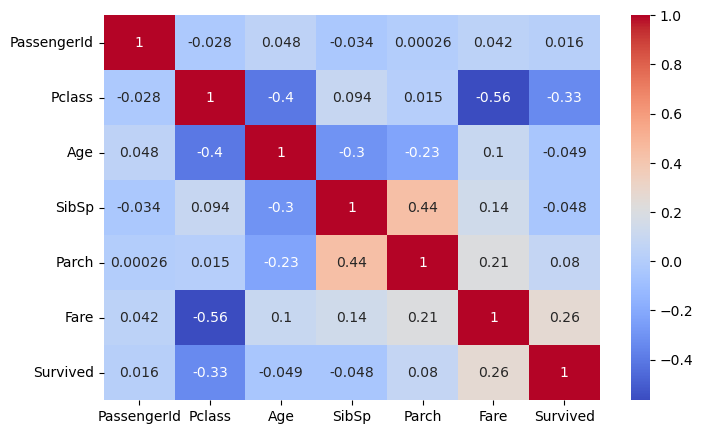

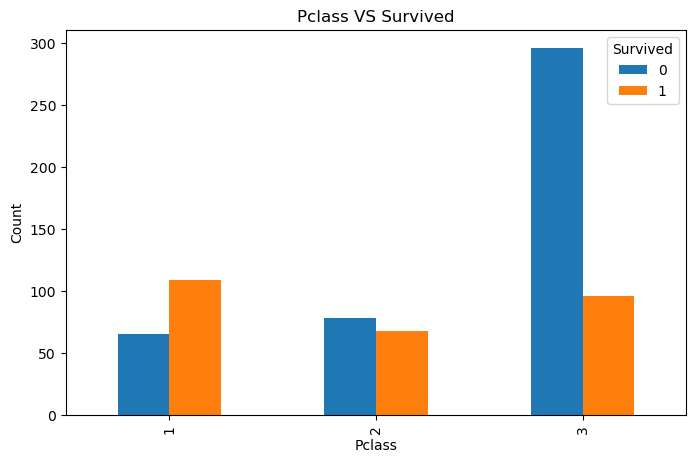

Survived    0    1
Pclass            
1          65  109
2          78   68
3         296   96


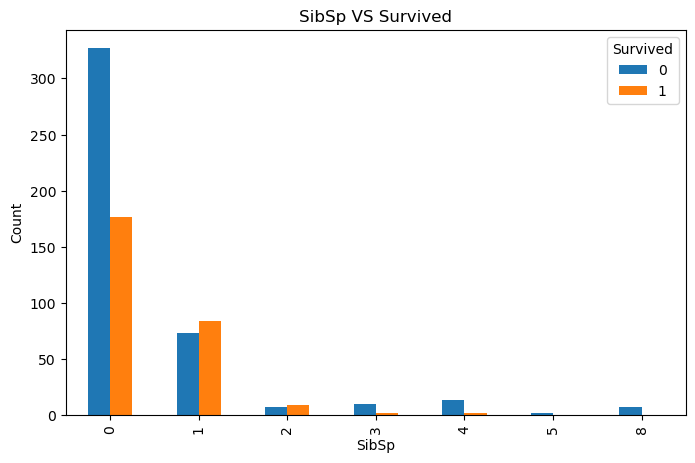

Survived    0    1
SibSp             
0         327  176
1          73   84
2           7    9
3          10    2
4          13    2
5           2    0
8           7    0


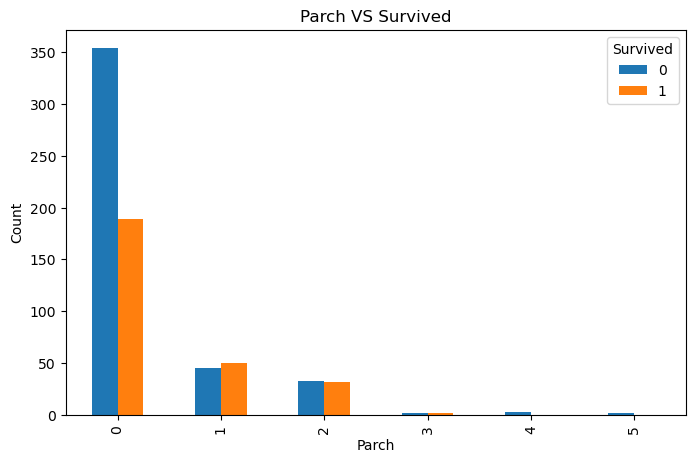

Survived    0    1
Parch             
0         354  189
1          45   50
2          33   32
3           2    2
4           3    0
5           2    0


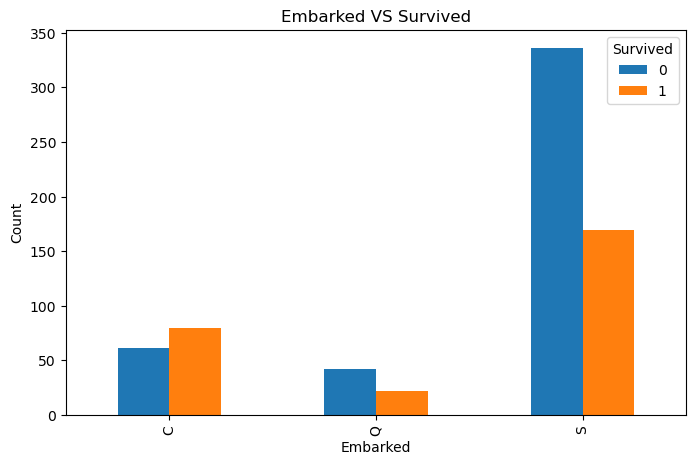

Survived    0    1
Embarked          
C          61   80
Q          42   22
S         336  169


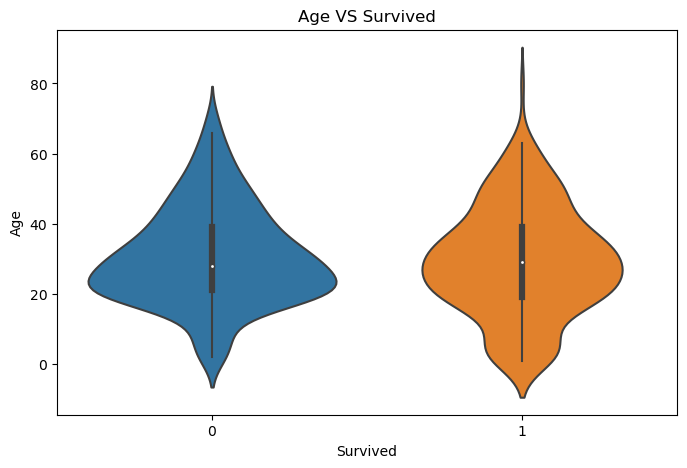

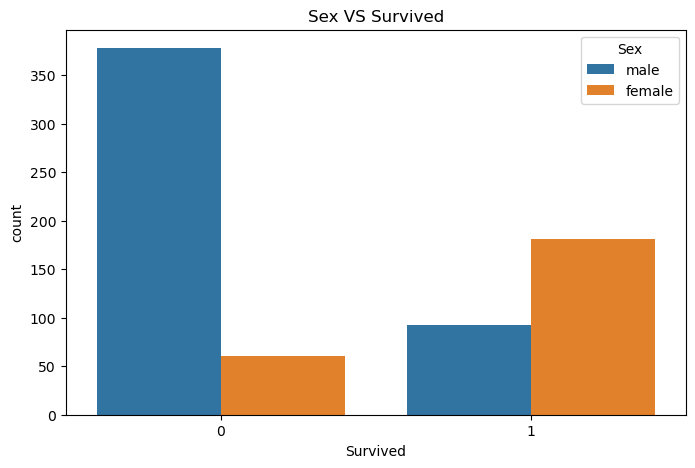

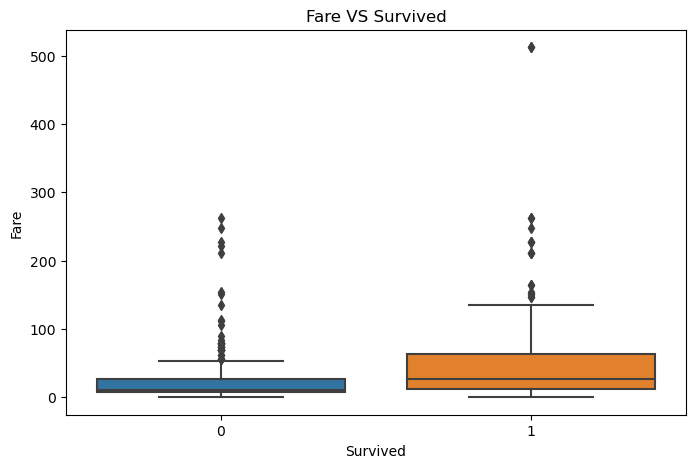

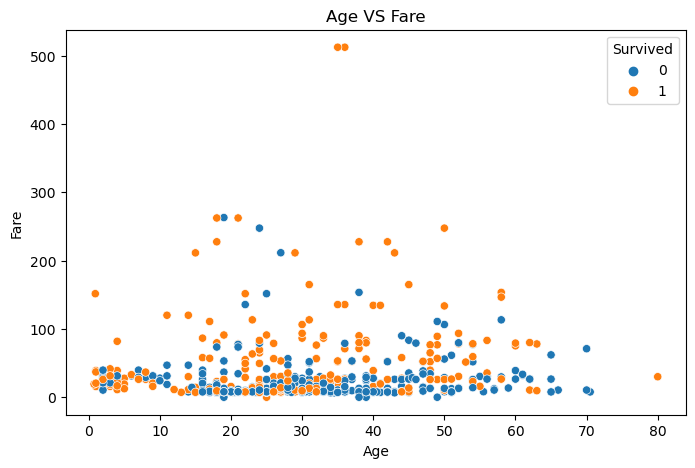

In [26]:
import seaborn as sb
import matplotlib.pyplot as plt

#Visualize correlation matrix
corr_matrix = titanic.corr()
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')

#Visualize the relationship between Pclass and Survived  
cont_table = pd.crosstab(titanic['Pclass'], titanic['Survived'])
cont_table.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Pclass VS Survived')
plt.show()
print(cont_table)

#Visualize the relationship between SibSp and Survived  
cont_table_2 = pd.crosstab(titanic['SibSp'], titanic['Survived'])
cont_table_2.plot(kind='bar')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('SibSp VS Survived')
plt.show()
print(cont_table_2)

#Visualize the relationship between SibSp and Survived  
cont_table_3 = pd.crosstab(titanic['Parch'], titanic['Survived'])
cont_table_3.plot(kind='bar')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Parch VS Survived')
plt.show()
print(cont_table_3)

#Visualize the relationship between SibSp and Survived  
cont_table_4 = pd.crosstab(titanic['Embarked'], titanic['Survived'])
cont_table_4.plot(kind='bar')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Embarked VS Survived')
plt.show()
print(cont_table_4)

#Visualize the realationship between Age and Survived
sb.violinplot(data=titanic, x='Survived', y='Age')
plt.title('Age VS Survived')
plt.show()

# Visualize the relationship between two categorical columns
sb.countplot(data=titanic, x='Survived', hue='Sex')
plt.title('Sex VS Survived')
plt.show()

#Visualize the realationship between Age and Survived
sb.boxplot(data=titanic, x='Survived', y='Fare')
plt.title('Fare VS Survived')
plt.show()

# Visualize the relationship between two numerical columns
sb.scatterplot(data=titanic, x='Age', y='Fare', hue='Survived')
plt.title('Age VS Fare')
plt.show()


From the visualization we can learn few things that will help us deal with the data later :
- The correlation heatmap guide me throw all the models and features selection.
- We can see clearly that passengers in first class had the highest survival rate, while those in third class had the lowest. This suggests that the wealthiest individuals had a greater chance of survival. We can further examine this theory with additional visualizations.
- We can see that only passengers with one or two siblings/spouses have a higher survival rate than those without.
- We can see that only passengers with one parents/children have a higher survival rate than those without.
- We can see that Cherbourg port of Embarkation has the highest survival rate. 
- As we mentioned previously, there is no significant difference in the age statistics between passengers who survived and those who did not, which is also evident from our violin plot.
- We can see that there is clearly massive differnet between male and female survival rate.
- We can see that there is clearly differnce in the survival rate between expensive fare prices and cheaper fare prices.

### Missing values and non numeric features handeling

In [27]:
#Count the number of missing values in each column
print(titanic.isnull().sum())

#Replace missing values to 'Age' column with the median
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

#Replace missing values to 'Embarked' column with the mode of the column
Em_replace = titanic['Embarked'].mode()[0]
print("\nThe most frequency port of Embarkation is : ", Em_replace, "\n")
titanic['Embarked'] = titanic['Embarked'].fillna(Em_replace)

#Dealing with 'Cabin' column's missing values
print(titanic['Cabin'].value_counts())

#Replace Sex column values with 0s and 1s
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
print("\nFrom now on male = 0, and female = 1\n")

#Replace Embarked column values with 1, 2 and 3
titanic['Embarked'] = titanic['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})
print("From now on C = 1, Q = 2, and S = 3")

#Removing columns with string or Irrelevant information 
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            143
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          549
Embarked         2
Survived         0
dtype: int64

The most frequency port of Embarkation is :  S 

G6      4
D       3
C124    2
E25     2
C78     2
       ..
C101    1
C99     1
C111    1
C82     1
C54     1
Name: Cabin, Length: 128, dtype: int64

From now on male = 0, and female = 1

From now on C = 1, Q = 2, and S = 3


- Age column: I decided to replace missing values with its median value.
- Embarked column: I decided to replace missing values with its mode value.
- Cabin column: I decided not to replace missing values because I did not find any significant correlation between this column and others in the dataset.
Moreover, with only 128 values out of a total of 712, it is not sufficient to draw conclusions for the entire dataset. 
Additionally, there is no strong frequency of specific characters or cabins in the data. Therefore, I chose to leave the column as is.

### KNN Model - all features expect non numeric
- 5 fold cross validation method
- N neighbors form 1 - 10
- runs on every fold and calculate the F1 average

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np


#X contains all the features (columns) of the dataset except the 'Survived' which is the target variable
X = titanic.drop('Survived', axis=1)

#y contains only the 'Survived' column, which is the target variable.
y = titanic['Survived']

# define parameter grid for GridSearchCV
#n_neighbors represents the number of neighbors we want to check on every fold from 1 to 10.
#p represents the Manhattan distance and the Euclidean distance.
#weights represents that all points in each neighborhood are weighted equally and invers of their distance
param_grid = {'n_neighbors': np.arange(1, 11),
              'p': [1, 2],
              'weights': ['uniform', 'distance']}

# perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=kf, scoring='f1')
grid_search.fit(X, y)

# print best hyperparameters and F1 score
print('Best hyperparameters:', grid_search.best_params_)
print('Best F1 score:', grid_search.best_score_)

best_params = grid_search.best_params_

#for the best F1 and N
best_scores = []

for n_neighbors in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, p=best_params['p'], 
                               weights=best_params['weights'])
    f1_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)
    avg_f1_score = np.mean(f1_scores)
    best_scores.append(avg_f1_score)
    print('\nN neighbors:', n_neighbors)
    print('F1 scores:', f1_scores)
    print('Average F1 score:', avg_f1_score)

best_avg_f1 = max(best_scores)

#because python start counting from 0 (alon the king)
best_n_neighbors = best_scores.index(best_avg_f1) + 1

print('\nBest F1 average score:', best_avg_f1)
print('Corresponding N neighbors:', best_n_neighbors)
    

Best hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best F1 score: 0.6126659552171938

N neighbors: 1
F1 scores: [0.5714285714285714, 0.5666666666666667, 0.5617977528089888, 0.536082474226804, 0.6915887850467289]
Average F1 score: 0.585512850035552

N neighbors: 2
F1 scores: [0.5765765765765767, 0.5689655172413792, 0.5747126436781609, 0.5376344086021505, 0.6666666666666666]
Average F1 score: 0.5849111625529868

N neighbors: 3
F1 scores: [0.5714285714285714, 0.5932203389830508, 0.6153846153846155, 0.5957446808510638, 0.6666666666666666]
Average F1 score: 0.6084889746627936

N neighbors: 4
F1 scores: [0.5740740740740741, 0.5689655172413792, 0.6373626373626373, 0.5869565217391305, 0.6666666666666666]
Average F1 score: 0.6068050834167775

N neighbors: 5
F1 scores: [0.5818181818181817, 0.5714285714285714, 0.6382978723404256, 0.5934065934065934, 0.6422018348623852]
Average F1 score: 0.6054306107712314

N neighbors: 6
F1 scores: [0.5765765765765767, 0.564102564102564, 0.67

- The best F1 average score is : 0.6126659552171938
- The corresponding N neighbors is : 7
- we used a for loop to iterate over different values of the hyperparameter n_neighbors from 1 to 10 and computed the F1 score for each value of n_neighbors. We then selected the hyperparameters with the best average F1 score

### KNN Model - with 'family_size' and scaling
- 5 fold cross validation method
- N neighbors form 1 - 21
- finds the best N as hyper parameter

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
import numpy as np


# create new features
titanic['family_size'] = titanic['Parch'] + titanic['SibSp']

# drop irrelevant features
X = titanic.drop(['Survived', 'Parch', 'SibSp'], axis=1)

#scaling all the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# define parameter grid for GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21),
              'p': [1, 2],
              'weights': ['uniform', 'distance']}

# perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=kf, scoring='f1')
grid_search.fit(X, y)

# print best hyperparameters and F1 score
print('Best hyperparameters:', grid_search.best_params_)
print('Best F1 score:', grid_search.best_score_, "\n")

# evaluate KNN with best hyperparameters
best_params = grid_search.best_params_
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], p=best_params['p'], 
                            weights=best_params['weights'])
f1_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
avg_f1_score = np.mean(f1_scores)
best_avg_f1 = max(f1_scores)
best_n_neighbors = f1_scores.index(best_avg_f1) + 1

print('Best F1 average score:', best_avg_f1,)
print('Corresponding N neighbors:', best_n_neighbors)

Best hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best F1 score: 0.7426121554986539 

Best F1 average score: 0.8172043010752689
Corresponding N neighbors: 3


- The best F1 average score is : 0.8172043010752689
- The corresponding N neighbors is : 3


### Short summary KNN
In summary, the second code searches for the optimal combination of all three hyperparameters, while the first code searches for the optimal combination of two hyperparameters and then uses a for loop to find the best value for one of the hyperparameters.

|  MODEL      |          K-fold              |              N                          | Average F1 score  |
|:-----------:|:----------------------------:|:---------------------------------------:|:-----------------:|
| KNN         | 5                            |3                                        | 0.8172043010752689|
| KNN         | 5                            |7                                        | 0.6126659552171938|

### Logistic Regression Model

In [30]:
from sklearn.model_selection import GridSearchCV, KFold,cross_val_score
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import statistics as st
from sklearn.preprocessing import StandardScaler


#There are a lot of param_grid arguments but i decided to search for the best this 2 hyper parameters
#C is the inverse of regularization strengthr egularization is used to prevent overfitting
#by adding a penalty term to the loss function and thats why i choose the c and penalty hyper parameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

#Create an instance of logistic regression model
logreg = LogisticRegression()

#Create a GridSearchCV object with 5-Fold cross-validation and f1 scoring method
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1')

#Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding f1 score
print('Best hyperparameters:', grid_search.best_params_)
print('Best F1 score:', grid_search.best_score_, "\n")

X = titanic.drop(['Parch', 'SibSp', 'Survived'], axis=1)
y = titanic['Survived']

#scaling all the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the logistic regression model with the best hyperparameters
lr = LogisticRegression(C=10, penalty='l2')

# Define the K-fold cross-validation generator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = {}
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores[fold] = f1
    
    print("Fold:", fold, "F1 Score:", f1,)

print("\nAverage f1 score: ", st.mean(f1_scores.values()))

Best hyperparameters: {'C': 10, 'penalty': 'l2'}
Best F1 score: 0.7082348002380501 

Fold: 0 F1 Score: 0.6605504587155963
Fold: 1 F1 Score: 0.7079646017699115
Fold: 2 F1 Score: 0.7789473684210527
Fold: 3 F1 Score: 0.6021505376344086
Fold: 4 F1 Score: 0.7522935779816513

Average f1 score:  0.7003813089045241


In [31]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, KFold

np.random.seed(25)

#i search by hand what is the best eta that produce me the best F1 average score and it was 0.00005
lgm = LogisticRegressionGD(eta=0.00005, n_iter=10000, eps=0.0001, random_state=50)
f1_scores = {}
kfold = KFold(n_splits=5, shuffle=True, random_state=50)

f1_scores = {}
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

    lgm.fit(X_train, y_train)
    y_pred = lgm.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores[fold] = f1
    
    print("Fold:", fold, "F1 Score:", f1)

print("\nAverage f1 score: ", st.mean(f1_scores.values()))


Fold: 0 F1 Score: 0.6666666666666666
Fold: 1 F1 Score: 0.72
Fold: 2 F1 Score: 0.7524752475247525
Fold: 3 F1 Score: 0.5934065934065934
Fold: 4 F1 Score: 0.7706422018348623

Average f1 score:  0.7006381418865749


### Cost function plot

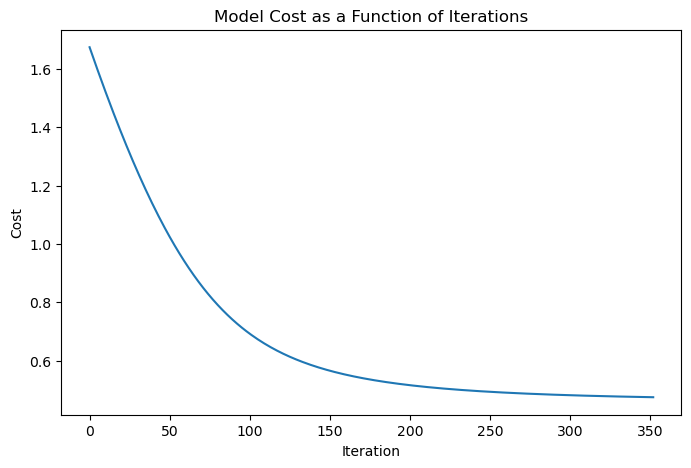

In [32]:
import matplotlib.pyplot as plt
import statistics

np.random.seed(25)

lgm = LogisticRegressionGD(eta=0.00005, n_iter=10000, eps=0.0001, random_state=50)

lgm.fit(X_train, y_train)
    
costs = lgm.cost # record cost at each iteration
number_of_iterations = len(costs)

plt.plot(range(number_of_iterations), costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Model Cost as a Function of Iterations')
plt.show()


### Short summary Logistic Regression 
- I compared two methods of logistic regression from the sklearn.linear_model library: LogisticRegression and SGDClassifier. To find the best hyperparameters for the LogisticRegression method, I created a list of possible values and used them to calculate the F1 score. I then implemented the hyperparameters that produced the best F1 score in the model. Next, I used 5-fold cross-validation to evaluate the model and found an average F1 score of 70.03%.


- For the SGDClassifier method, I set the eta parameter to 0.00005 and found that it produced the best average F1 score of 70.06%. To visualize the performance of the SGDClassifier model, I plotted the cost as a function of iteration using the chosen hyperparameters.

### General summary 

- I started my project by exploring my data using statistics and visualization techniques. 
    I also handled missing values and non-numeric features in the data, where I replaced missing values in the Age and Embarked columns with their median and mode values, respectively.
    For the Cabin column, I decided not to replace missing values since I did not find any significant correlation between this column and others in the dataset, and there were only 128 non-null values out of a total of 712.
    Additionally, there was no strong frequency of specific characters or cabins in the data.


- Next, I implemented my first KNN model using all features except non-numeric ones.
   I used a 5-fold cross-validation method and ran the model for N neighbors ranging from 1 to 10.
   I found that the best hyperparameters for the model were 'n_neighbors': 7, 'p': 1, 'weights': 'distance', and the corresponding F1 score was 61.26%.


- I then tried a second KNN model using the 'family_size' feature and scaling. This time, I ran the model for N neighbors ranging from 1 to 21 and found that the best F1 average score was 81.72% for N neighbors equal to 3.


- I also tried two different logistic regression models.
  The first one was LogisticRegression from the sklearn.linear_model library.
  I found that the best hyperparameters for this model were 'C': 10, 'penalty': 'l2'.
  Using the best hyperparameters and the 5-fold cross-validation method, I obtained an average F1 score of 70.03%.


- For the second logistic regression model, I used SGDClassifier from the sklearn.
  linear_model library, setting eta to 0.00005 and eps to 0.0001.
  Using the 5-fold cross-validation method, I obtained an average F1 score of 70.06%.
  I also plotted the model cost as a function of iteration to better understand the model's performance.


- Lastly, I tried linear regression as well, but its performance was not as good as the KNN and logistic regression models, so I decided to focus on those instead (0.5 and lower, so it better to use the random classifier model).

- |  MODEL             |          K-fold              |              Hyper Parameters             | Average F1 score  |
  |:------------------:|:----------------------------:|:-----------------------------------------:|:-----------------:|
  | KNN                | 5                            |N = 3, p = 1, weights = 'uniform'          | 0.8172043010752689|
  | KNN                | 5                            |N = 7, p = 1, weights = 'distance'         | 0.6126659552171938|
  | Logistic Regression| 5                            |C = 10, penalty = 'l2'                     | 0.7003813089045241|
  | Logistic Regression| 5                            |eta = 0.00005, n_iter = 10000, eps = 0.0001| 0.7006381418865749|
  
  
 
  
- As we can see, the best model is the KNN model that uses the 5-fold cross-validation method with N = 3 nearest neighbors, Manhattan distance, and weights set to 'distance', meaning that the contributions of closer neighbors have a greater influence than those of farther neighbors.